# 1. Classification

# Load this dataset from scikit-learn

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Classify using kNN with different k and simple neural network as described in Classification section.


# kNN with different k

In [2]:
from sklearn.model_selection import train_test_split
X = iris.data
Y =  iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

#Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

# knn score the model on the test set
acc = knn.score(X_test, Y_test)

# print the log loss
y_pred_prob = knn.predict_proba(X_test)
loss = log_loss(Y_test, y_pred_prob)
print("Test loss:", loss)

#Print the accuracy

print("Test accuracy:", acc)

Test loss: 0.02703100720721139
Test accuracy: 1.0


8/8 [====================] - 1.0000 - k: 8
Test accuracy: 1.0000


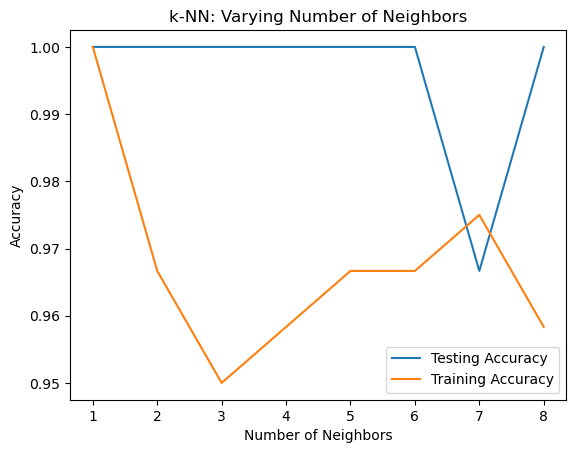

In [4]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, Y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, Y_test)

    # Print the accuracy for the current value of k
    print(f"{i+1}/{len(neighbors)} [{'='*int(test_accuracy[i]*20):<20}] - {test_accuracy[i]:.4f} - k: {k}")

# Print the final testing accuracy
print(f"Test accuracy: {test_accuracy[-1]:.4f}")

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


# simple neural network

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode target variable
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/50
12/12 [==============================] - 0s 1ms/step - loss: 1.1488 - accuracy: 0.3750
Epoch 2/50
12/12 [==============================] - 0s 907us/step - loss: 1.0754 - accuracy: 0.6167
Epoch 3/50
12/12 [==============================] - 0s 907us/step - loss: 1.0286 - accuracy: 0.6417
Epoch 4/50
12/12 [==============================] - 0s 997us/step - loss: 1.0076 - accuracy: 0.6167
Epoch 5/50
12/12 [==============================] - 0s 907us/step - loss: 0.9960 - accuracy: 0.5333
Epoch 6/50
12/12 [==============================] - 0s 909us/step - loss: 0.9852 - accuracy: 0.5250
Epoch 7/50
12/12 [==============================] - 0s 997us/step - loss: 0.9755 - accuracy: 0.5417
Epoch 8/50
12/12 [==============================] - 0s 1000us/step - loss: 0.9656 - accuracy: 0.5250
Epoch 9/50
12/12 [==============================] - 0s 907us/step - loss: 0.9556 - accuracy: 0.5333
Epoch 10/50
12/12 [==============================] - 0s 907us/step - loss: 0.9439 - accuracy: 0.5417


1/1 [==============================] - 0s 18ms/step - loss: 1.1491 - accuracy: 0.6333
Test accuracy: 0.6333333253860474


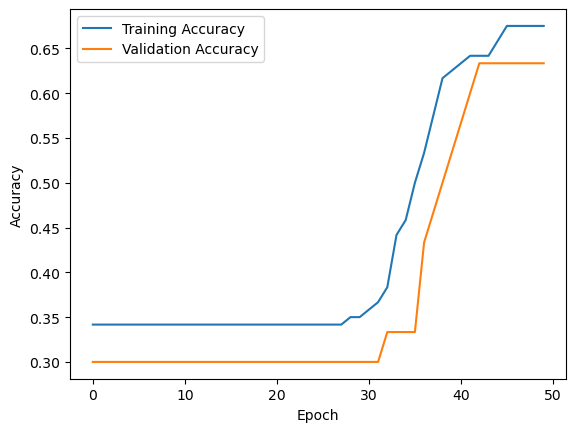

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network with one hidden layer of 10 nodes
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

# Plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# Classify using deep learning with CNN (1 plus)


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to match the input shape of a CNN
X_train = X_train.reshape(-1, 4, 1, 1)
X_test = X_test.reshape(-1, 4, 1, 1)


In [9]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 1), activation='relu', input_shape=(4, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
4/4 [==============================] - 1s 45ms/step - loss: 1.1287 - accuracy: 0.2083 - val_loss: 1.1180 - val_accuracy: 0.1333
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0939 - accuracy: 0.3000 - val_loss: 1.0864 - val_accuracy: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0680 - accuracy: 0.3417 - val_loss: 1.0630 - val_accuracy: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0433 - accuracy: 0.3417 - val_loss: 1.0427 - val_accuracy: 0.3667
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0252 - accuracy: 0.3583 - val_loss: 1.0245 - val_accuracy: 0.4000
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0091 - accuracy: 0.4250 - val_loss: 1.0083 - val_accuracy: 0.4667
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9922 - accuracy: 0.5083 - val_loss: 0.9915 - val_accuracy: 0.5333
Epoch 8/50
4/4 [=================

1/1 [==============================] - 0s 18ms/step - loss: 0.6415 - accuracy: 0.7667
Test loss: 0.6415289640426636
Test accuracy: 0.7666666507720947


<Figure size 640x480 with 0 Axes>

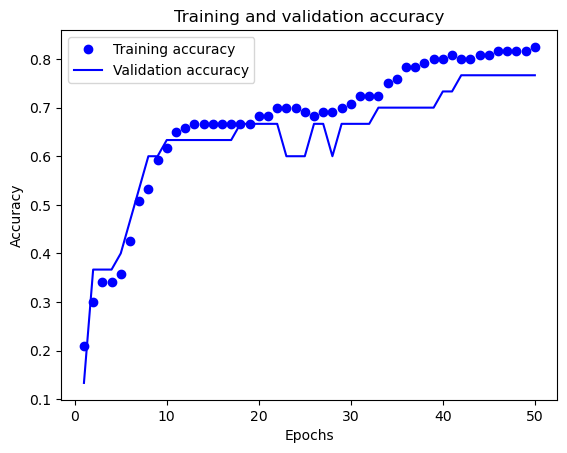

<Figure size 640x480 with 0 Axes>

In [10]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Visualize the training and validation accuracy and loss over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


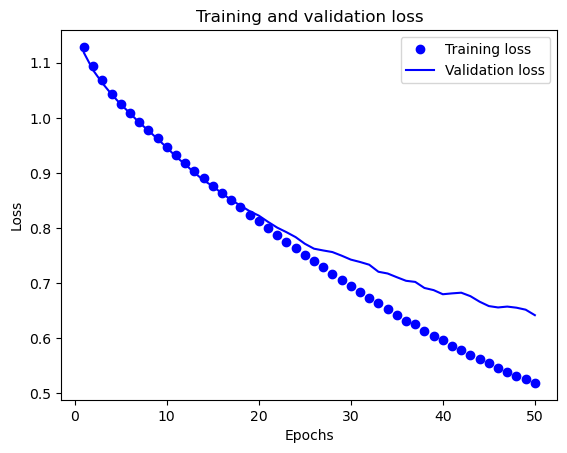

In [11]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 2. Recommendation Systems 


a. Content-Based Recommendation Model


# ❖ Find list of used genres which is used to category the movies.


In [12]:
import pandas as pd
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
users = pd.read_csv('users.csv')
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
print(list(movies.genres))

["Animation|Children's|Comedy", "Adventure|Children's|Fantasy", 'Comedy|Romance', 'Comedy|Drama', 'Comedy', 'Action|Crime|Thriller', 'Comedy|Romance', "Adventure|Children's", 'Action', 'Action|Adventure|Thriller', nan, 'Comedy|Horror', "Animation|Children's", 'Drama', 'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance', 'Thriller', 'Comedy', 'Action', 'Action|Comedy|Drama', 'Crime|Drama|Thriller', 'Thriller', 'Drama|Sci-Fi', 'Drama|Romance', 'Drama', 'Drama', 'Romance', nan, 'Drama', 'Drama', 'Drama|Sci-Fi', 'Adventure|Romance', "Children's|Comedy|Drama", 'Drama|Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy|Romance', nan, 'Drama|War', 'Action|Crime|Drama', 'Drama', 'Action|Adventure', 'Comedy|Drama', 'Drama|Romance', 'Crime|Thriller', "Animation|Children's|Musical|Romance", 'Drama|Romance', nan, 'Action|Drama|Thriller', 'Comedy', 'Drama', nan, 'Drama', "Adventure|Children's|Fantasy", 'Drama', nan, nan, nan, 'Drama|Thriller', 'Drama', 'Comedy', 'Comedy|Romance', 'Comedy'

# ❖ Vectorize the relationship between movies and genres and put them into Ij.


In [14]:
# Convert float values in the 'genres' column to empty strings
movies['genres'] = movies['genres'].apply(lambda x: '' if isinstance(x, float) else x)

# Split the genre strings into lists of genres
movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

# Create a MultiLabelBinarizer object to binarize the genres
mlb = MultiLabelBinarizer()

# Binarize the genres for each movie and create a new dataframe with the binary vectors
genres = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_, index=movies.index)

# Select the subset of the binary vectors corresponding to the genres
Ij = genres.values

# Print the first four rows of Ij
print(Ij[:4])


[[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]]


# ❖ Compute the cosine_similarity between movies and users. Hint: you can use sklearn.metrics.pairwise and cosine_similarity for quick calculation.


In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Assume we have a list of dictionaries called 'ratings' where each dictionary
# represents a user's ratings for different movies
ratings_list = []
for _, row in ratings.iterrows():
    rating_dict = {'userId': row['user_id'], 'movieId': row['movie_id'], 'rating': row['rating']}
    ratings_list.append(rating_dict)

# Convert the list of dictionaries to a numpy array
ratings_matrix = np.array([list(r.values()) for r in ratings_list])

# Compute cosine similarity between all pairs of rows in the matrix
user_similarity = cosine_similarity(ratings_matrix)

# Assume we have a matrix called 'movies_matrix' where each row represents a movie
# and each column represents a feature of that movie (e.g. genre, director, etc.)

# Convert movie genres to numerical values
genres = set()
for genre_string in movies['genres'].values:
    if not isinstance(genre_string, str):  # check if the value is not a string
        continue
    genres.update(genre_string.split('|'))

genre_dict = {genre: i for i, genre in enumerate(sorted(genres))}
movies_matrix = np.zeros((movies.shape[0], len(genres)))
for i, genre_string in enumerate(movies['genres'].values):
    if not isinstance(genre_string, str):  # check if the value is not a string
        continue
    for genre in genre_string.split('|'):
        movies_matrix[i, genre_dict[genre]] = 1

# Compute cosine similarity between all pairs of rows in the matrix
movie_similarity = cosine_similarity(movies_matrix)


In [16]:
print(movie_similarity)

[[1.         0.33333333 0.40824829 ... 0.         0.         0.        ]
 [0.33333333 1.         0.         ... 0.         0.         0.        ]
 [0.40824829 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.5       ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.5        0.         1.        ]]


# b. Collaborative Filtering Recommendation Model by Users


# ❖ Use train_test_split to split above dataset with the ratio 50/50. The test dataset will be used as groundtruth to evaluate the rating calculated by using the train dataset


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
ratings = pd.read_csv('ratings.csv')


# Split the dataset into training and testing sets
train_ratings, test_ratings = train_test_split(ratings, test_size=0.5, random_state=42)

# Calculate ratings using the training dataset
ratings = train_ratings.groupby(['user_id', 'movie_id'])['rating'].mean().reset_index()

# Print the ratings for the first 10 users and products
print(ratings.head(10))


   user_id  movie_id  rating
0        1         3     5.0
1        1         4     4.0
2        1         5     3.0
3        1         6     3.0
4        1         7     3.0
5        1         9     3.0
6        1        10     2.0
7        1        12     4.0
8        1        13     1.0
9        1        15     5.0


# ❖ Create matrix for users, movies and ratings in both training and testing datasets. Hint

train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', 
values='rating').astype('float64')

test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', 
values='rating').astype('float64')

In [18]:
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')

# Split the data into training and testing datasets
train_data = ratings.sample(frac=0.8, random_state=42)
test_data = ratings.drop(train_data.index)

# Create matrix for training dataset
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

# Create matrix for testing dataset
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

# Print the shape of the matrices
print('Training dataset matrix shape:', train_data_matrix.shape)
print('Testing dataset matrix shape:', test_data_matrix.shape)


Training dataset matrix shape: (100, 100)
Testing dataset matrix shape: (100, 100)
